# CHEM277B Homework 1
## Trevor Oldham
## January 25 2023
## UC Berkeley CoC

### Helping Functions


In [1]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

In [2]:
%matplotlib notebook
def draw_path(func,path,x_min=-2,x_max=2,y_min=-2,y_max=2):
    a=np.linspace(x_min,x_max,100)
    b=np.linspace(y_min,y_max,100)
    x,y=np.meshgrid(a,b)
    z=func((x,y))
    fig,ax=plt.subplots()
    my_contour=ax.contour(x,y,z,50)
    plt.colorbar(my_contour)
    ax.plot(path[:,0],path[:,1])

### Problem 2

In [89]:
from pylab import *
import numpy.linalg as LA

### Defining Function and Derivative

In [75]:
def function(arr):
    return arr[0]**4 - arr[0]**2 + arr[1]**2 + 2*arr[0]*arr[1] -2

In [76]:
def first_derivative(arr):
    grad = np.array([4*arr[0]**3 - 2*arr[0] + 2*arr[1], 2*arr[1] + 2*arr[0]])
    return grad

### (A)

Demonstrating one step of the steepest descent algorithm to check against debugging output:

In [83]:
@timeit
def steepest_descent_step(func,first_derivate,starting_point,stepsize,tol):
    # evaluate the gradient at starting point
    
    deriv = first_derivate(starting_point)
    
    count=0
    visited=[]
    
           
    new_point = starting_point - deriv*stepsize
    visited.append(new_point)
    deriv = first_derivate(new_point)

    # return the results
    return {"x":starting_point,"evaluation":func(new_point), "path":np.asarray(visited)}

In [118]:
start = np.array([1.5, 1.5])
stepsize = 0.1
tol = 1e-5
print("Function evaluation at starting point" , function(start))

steepest_descent_step(function, first_derivative, start, stepsize, tol)

Function evaluation at starting point 7.5625
func:'steepest_descent_step' took: 0.0001 sec


{'x': array([1.5, 1.5]),
 'evaluation': -0.9419937500000004,
 'path': array([[0.15, 0.9 ]])}

The output is as expected and the function evaluates to -0.94199 at the new point which is lower than the function evaluated at the starting point which is 7.5625. This means that the path was followed toward the minimum and the step was a good one. We can increase the value of the stepsize by a factor of 1.2 and iterate again. 

## (B)

Here is the algorithm to iterate over the path using steepest descent.

In [155]:
@timeit
def steepest_descent(func,first_derivate,starting_point,stepsize,tol):
    # evaluate the gradient at starting point
    
    deriv = first_derivate(starting_point)
    
    count=0
    visited=[]
    
    while LA.norm(deriv) > tol and count < 1e6:
        # calculate new point position
       
        deriv = first_derivative(starting_point)
        new_point = starting_point - deriv*stepsize
        #visited.append(new_point)
        
        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = stepsize*1.2
            starting_point = new_point
            visited.append(new_point)
            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            stepsize = stepsize*0.5
            #starting_point = new_point
            deriv = first_derivate(starting_point)
        count+=1
    # return the results
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited), "count":count} , np.asarray(visited)

In [156]:
start = np.array([1.5, 1.5])
stepsize = 0.1
tol = 1e-5
print("Function evaluation at starting point" , function(start))

out , path = steepest_descent(function, first_derivative, start, stepsize, tol)
print(out)

Function evaluation at starting point 7.5625
func:'steepest_descent' took: 0.0088 sec
{'x': array([-0.99999972,  0.99999691]), 'evaluation': -2.999999999991799, 'path': array([[ 0.15      ,  0.9       ],
       [-0.03162   ,  0.648     ],
       [-0.22733235,  0.47048256],
       [-0.4603766 ,  0.38644985],
       [-0.73063964,  0.41710875],
       [-0.91361447,  0.57314178],
       [-0.89067253,  0.77647099],
       [-0.98168777,  0.81739147],
       [-0.94167921,  0.88803587],
       [-1.0240441 ,  0.91571465],
       [-0.95964931,  0.94925202],
       [-1.01216804,  0.95311466],
       [-0.98795692,  0.96627781],
       [-0.99481157,  0.9720766 ],
       [-0.99412388,  0.97937406],
       [-0.99741632,  0.98505533],
       [-0.99646125,  0.99076871],
       [-1.00111334,  0.9939261 ],
       [-0.99723697,  0.99631795],
       [-1.00126535,  0.99668496],
       [-0.99895278,  0.99778247],
       [-0.99981882,  0.99811897],
       [-0.99948229,  0.99870549],
       [-1.00001741,  0.99

The algorithm terminates having found the correct minimum as described in the debugging output, within a certain tolerance of error. However, the count is 52 steps to converge, whereas the example output suggests that it should converge in 41 steps, and it took roughly four multiples in time than the debugging output suggests.

<IPython.core.display.Javascript object>


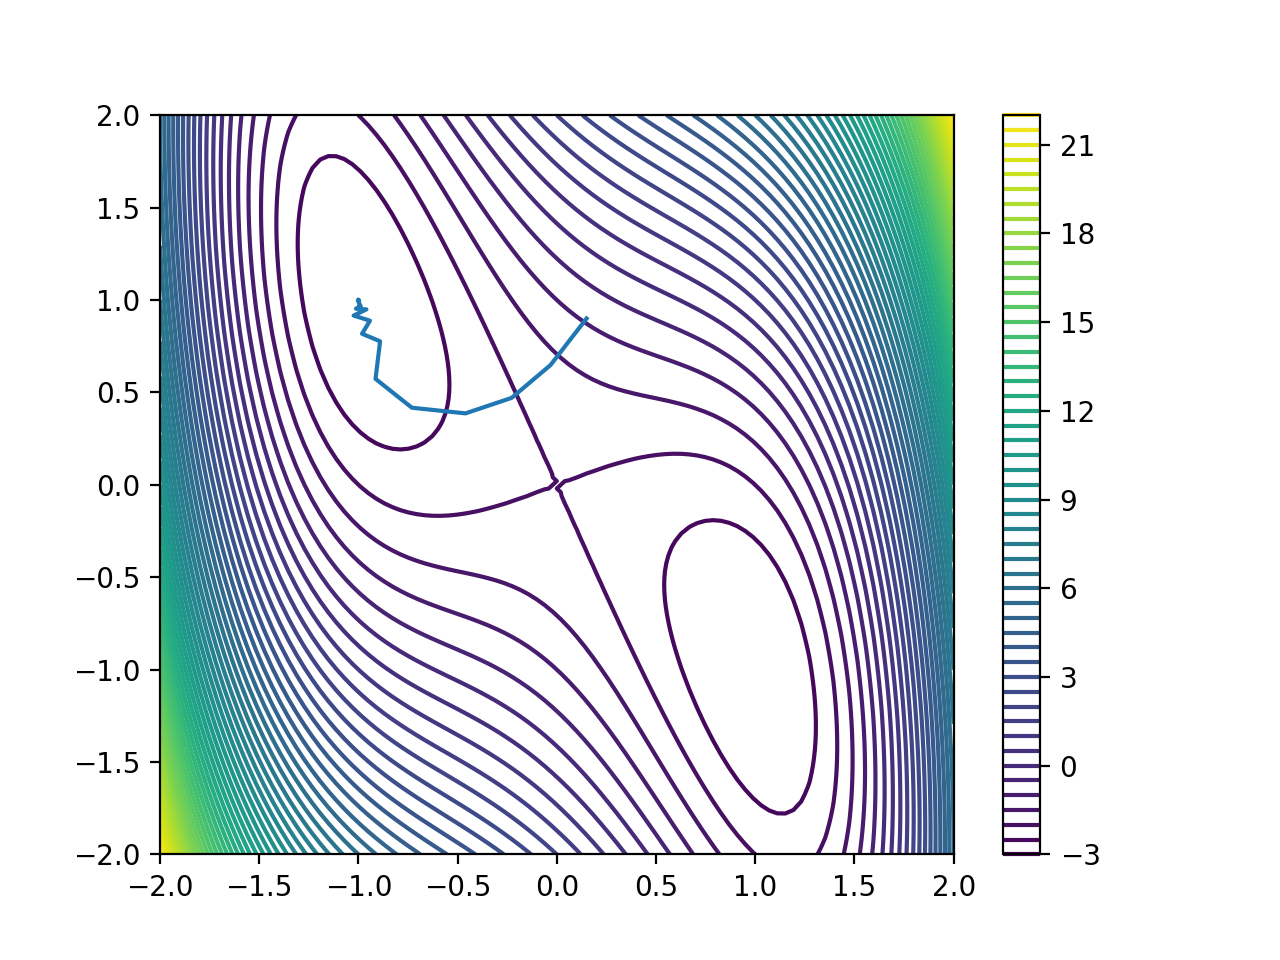

In [157]:
draw_path(function, path)